In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## 0. 라이브러리 가져오기

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Dataset 확인


In [73]:
df_train = pd.read_csv('/content/drive/MyDrive/24-1 KUBIG DA/ch1/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/24-1 KUBIG DA/ch1/test.csv')

In [74]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [245]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### 1-1. Null data check

In [78]:
for col in df_train.columns:
    msg_train = 'column: {:>10}\t Null 값 비율: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg_train)

column: PassengerId	 Null 값 비율: 0.00%
column:   Survived	 Null 값 비율: 0.00%
column:     Pclass	 Null 값 비율: 0.00%
column:       Name	 Null 값 비율: 0.00%
column:        Sex	 Null 값 비율: 0.00%
column:        Age	 Null 값 비율: 19.87%
column:      SibSp	 Null 값 비율: 0.00%
column:      Parch	 Null 값 비율: 0.00%
column:     Ticket	 Null 값 비율: 0.00%
column:       Fare	 Null 값 비율: 0.00%
column:      Cabin	 Null 값 비율: 77.10%
column:   Embarked	 Null 값 비율: 0.22%


In [79]:
for col in df_test.columns:
    msg_test = 'column: {:>10}\t Null 값 비율: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg_test)

column: PassengerId	 Null 값 비율: 0.00%
column:     Pclass	 Null 값 비율: 0.00%
column:       Name	 Null 값 비율: 0.00%
column:        Sex	 Null 값 비율: 0.00%
column:        Age	 Null 값 비율: 20.57%
column:      SibSp	 Null 값 비율: 0.00%
column:      Parch	 Null 값 비율: 0.00%
column:     Ticket	 Null 값 비율: 0.00%
column:       Fare	 Null 값 비율: 0.24%
column:      Cabin	 Null 값 비율: 78.23%
column:   Embarked	 Null 값 비율: 0.00%


<Axes: >

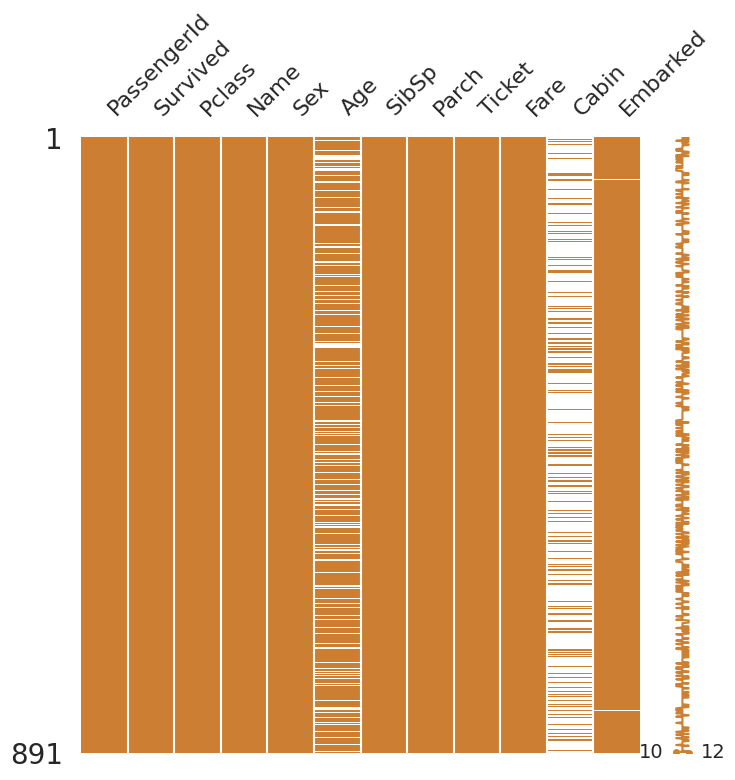

In [80]:
msno.matrix(df = df_train.iloc[:, :], figsize = (8,8), color = (0.8, 0.5, 0.2))

<Axes: >

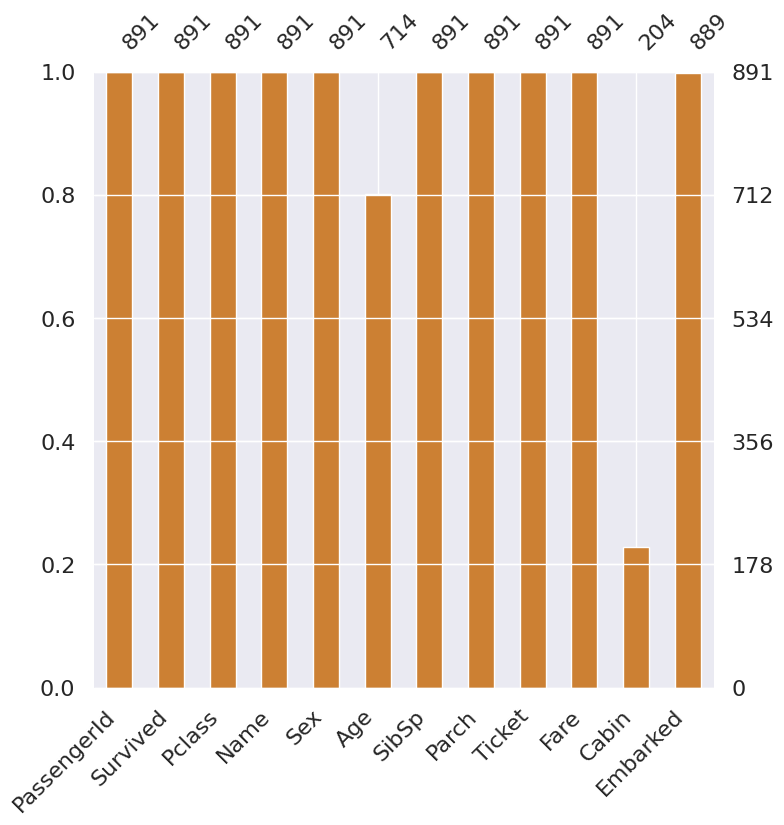

In [81]:
msno.bar(df = df_train.iloc[:, :], figsize = (8,8), color =(0.8, 0.5, 0.2) )

<Axes: >

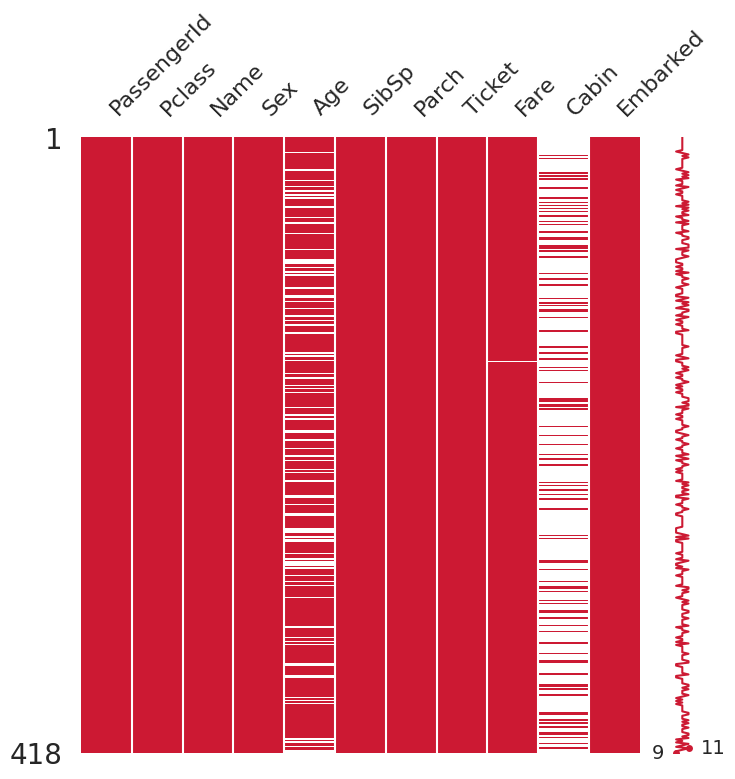

In [82]:
msno.matrix(df = df_test.iloc[:, :], figsize = (8,8), color =(0.8, 0.1, 0.2) )

<Axes: >

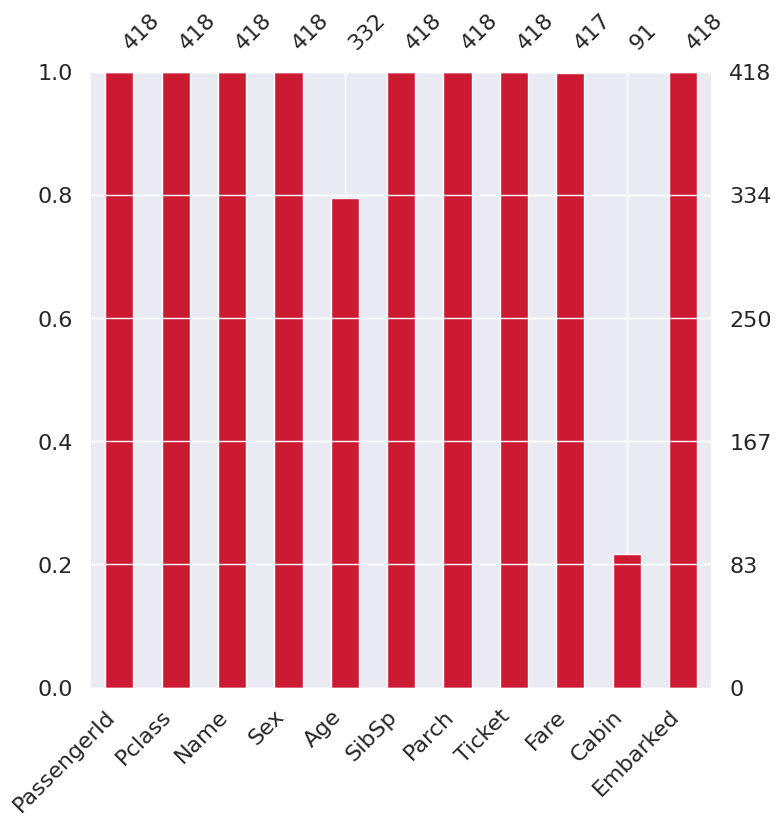

In [83]:
msno.bar(df = df_test.iloc[:, :], figsize = (8,8), color =(0.8, 0.1, 0.2) )

### 1-2. Target label 확인

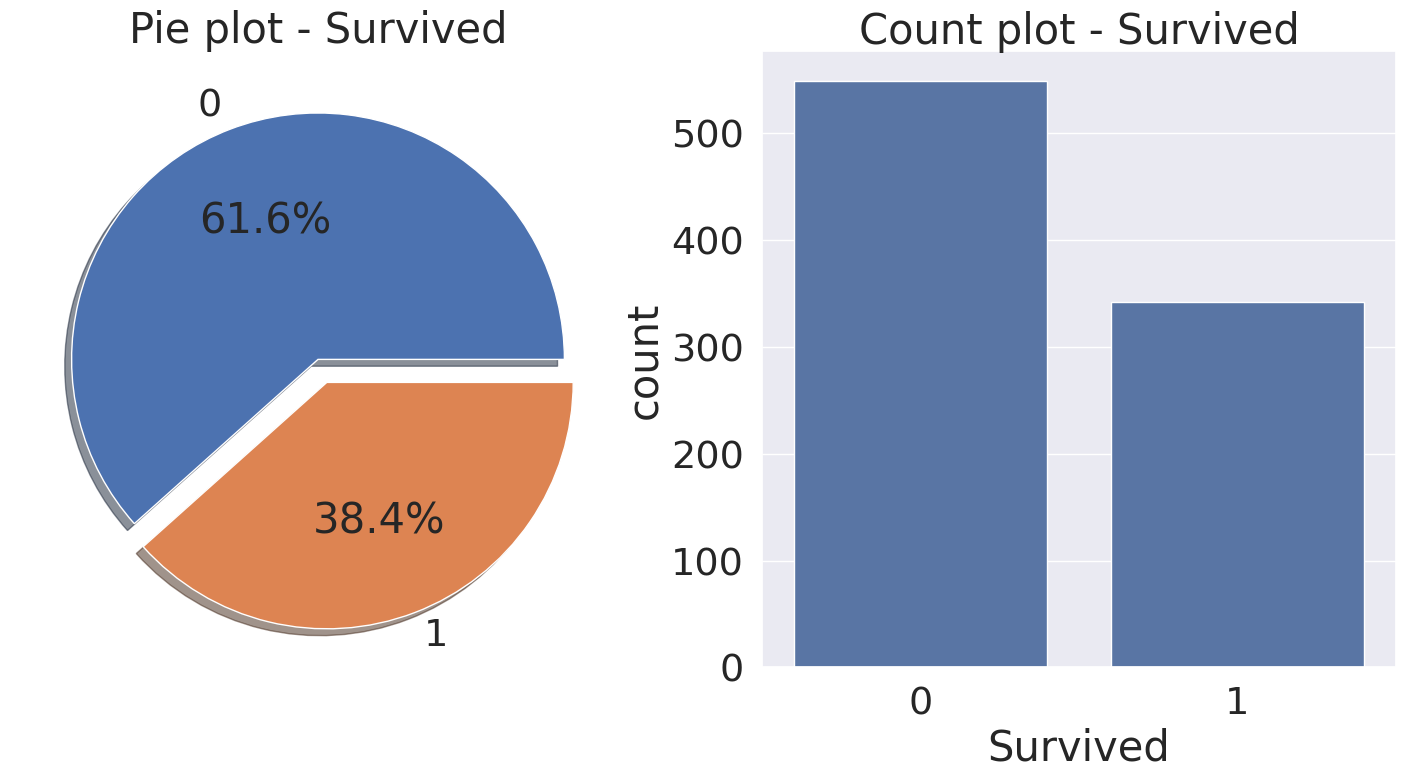

In [84]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


## 2. Exploratory data analysis

### 2-1 Pclass

In [85]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [86]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [87]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

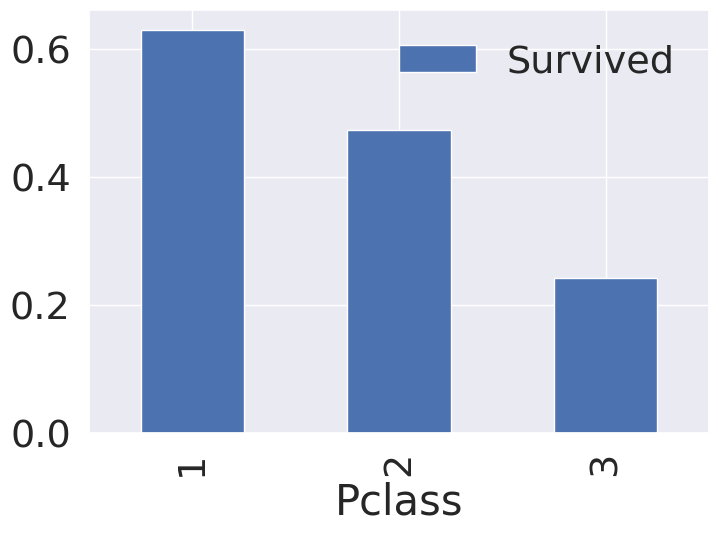

In [88]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

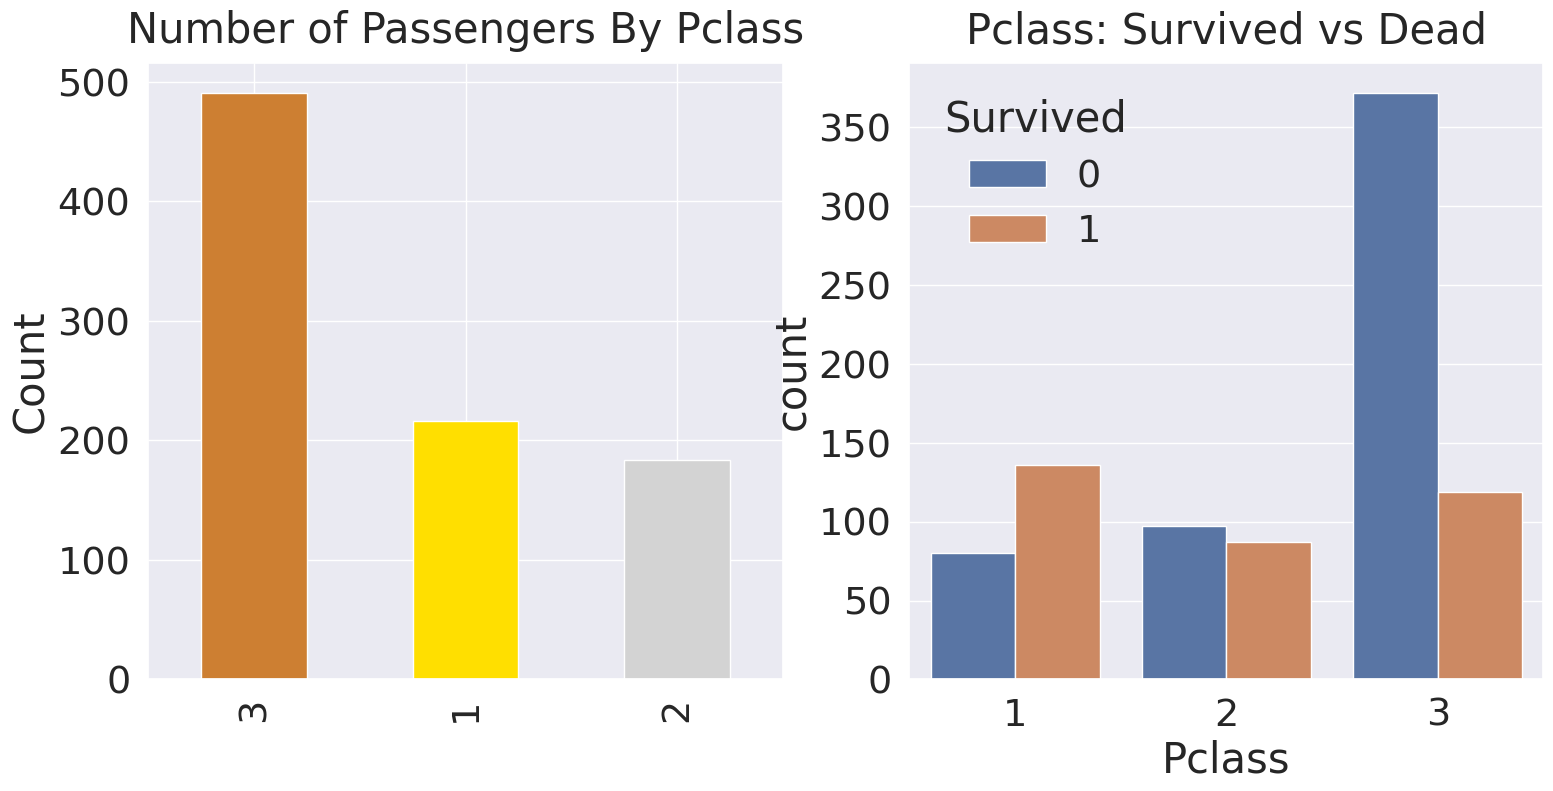

In [249]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)

ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train , ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

<Axes: xlabel='count'>

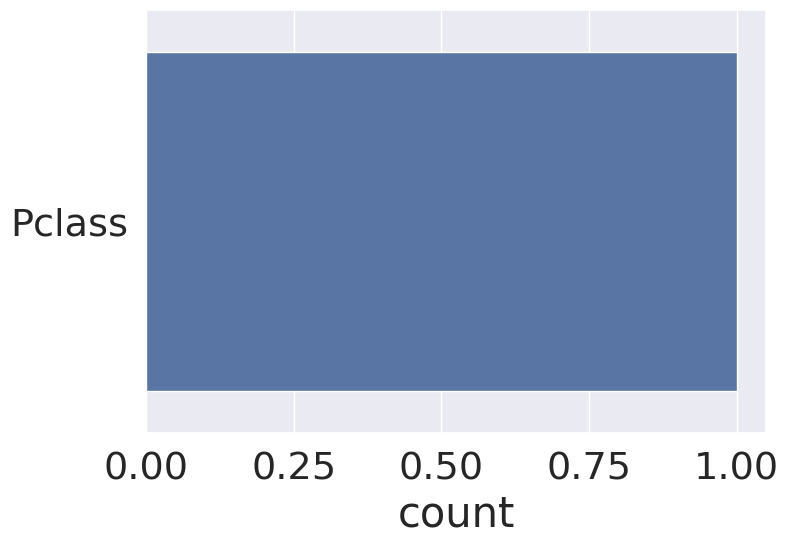

In [105]:
sns.countplot('Pclass')

기존 코드대로 하면 안됨. x = 지정

seaborn 라이브러리 버전문제 때문이다~

### 2-2 Sex



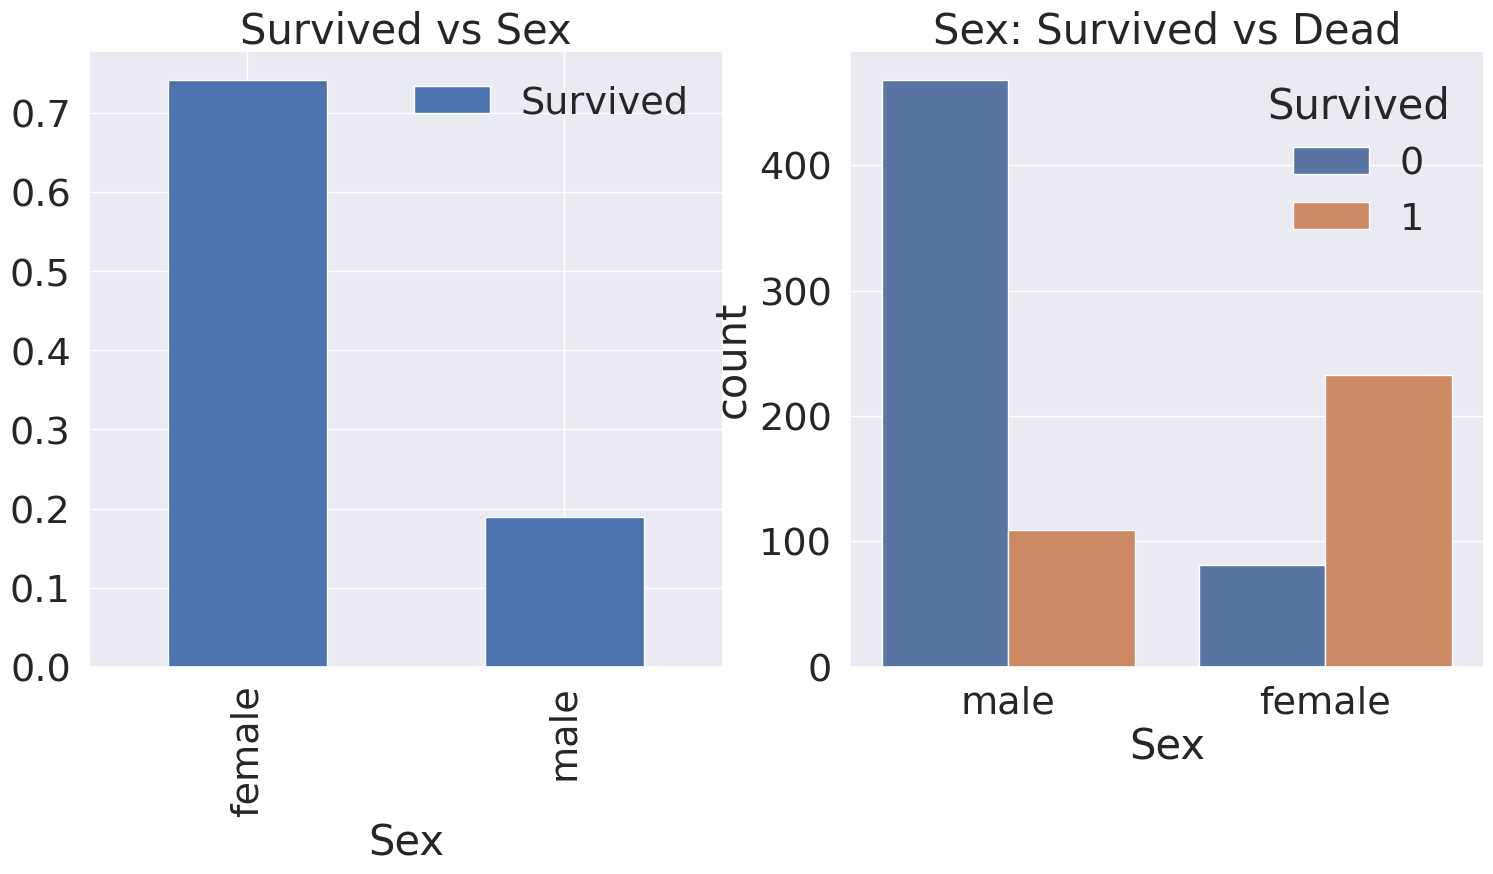

In [108]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [109]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [110]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2-3. Both Sex and Pclass

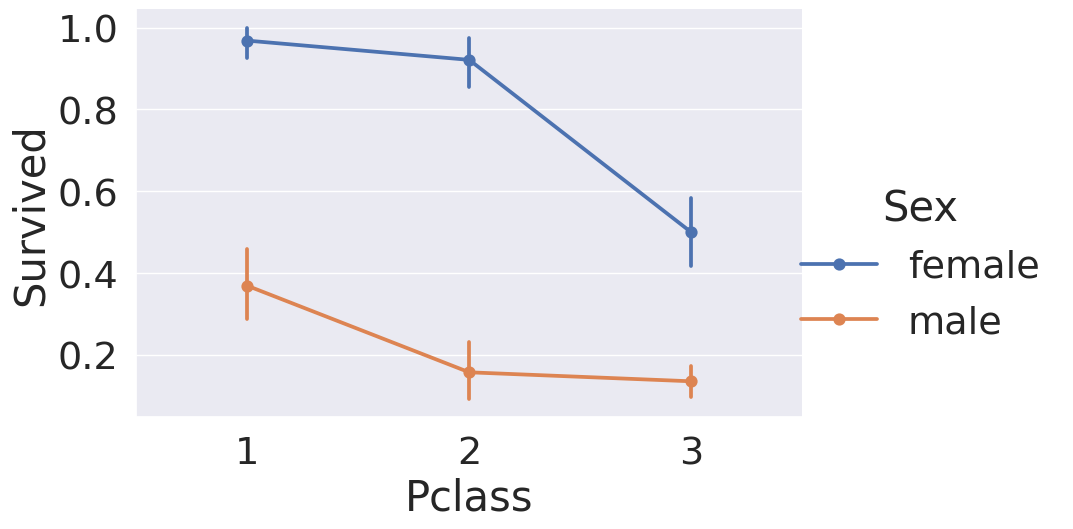

In [116]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', palette='deep', height=6, aspect=1.5)

plt.show()

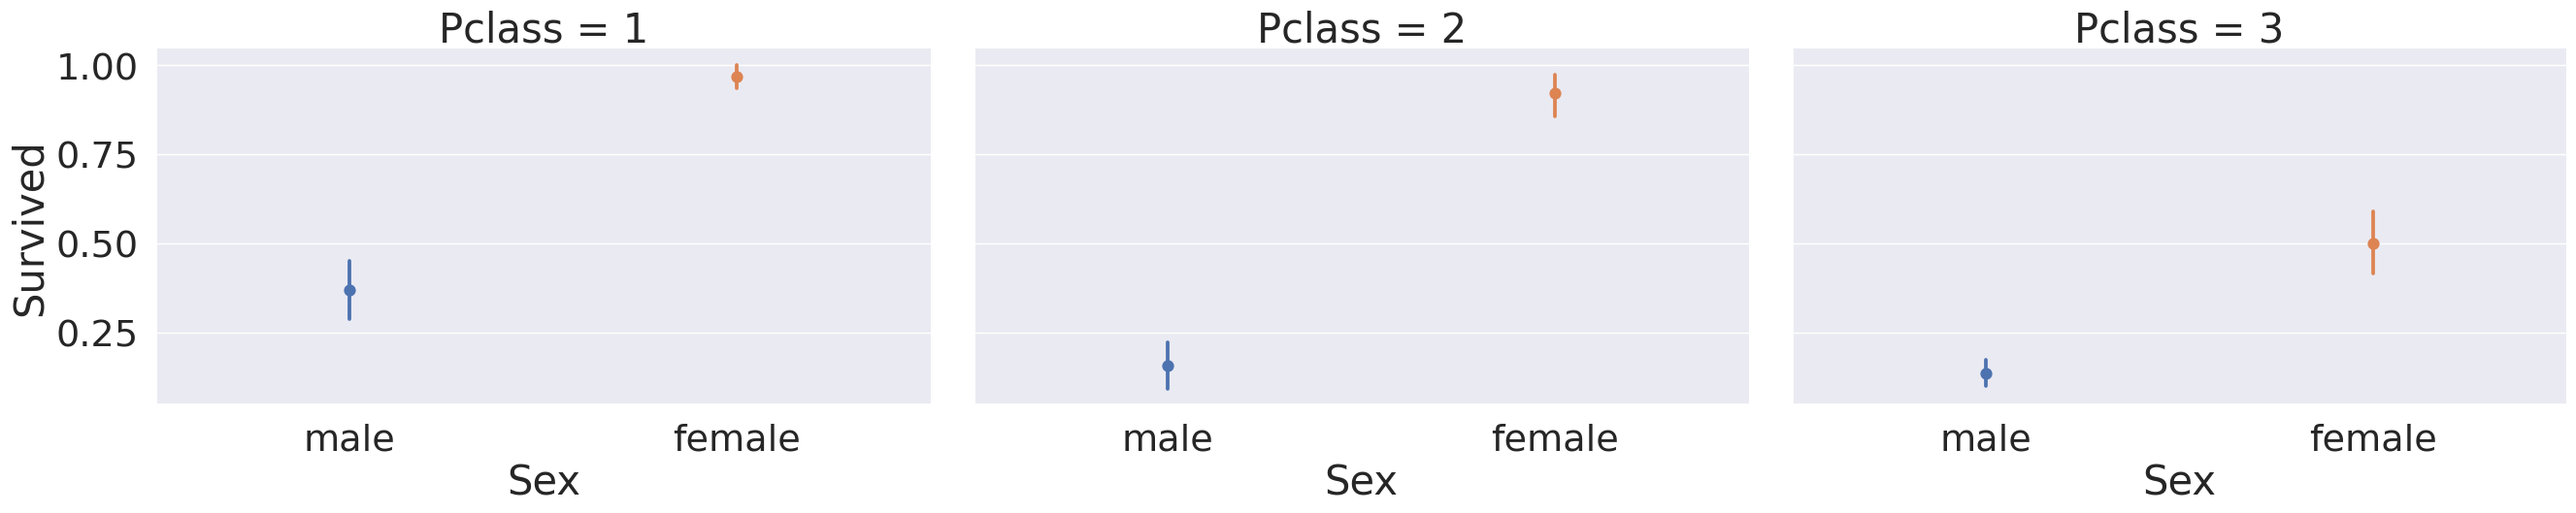

In [118]:
sns.catplot(x='Sex', y= 'Survived', col = 'Pclass', data=df_train, kind='point', palette='deep', height=6, aspect=1.5)

### 2-5. Age

In [124]:
print('가장 나이가 많은 탑승객 : {: .1f} 살'.format(df_train['Age'].max()))
print('가장 나이가 적은 탑승객 : {: .1f} 살'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {: .1f} 살'.format(df_train['Age'].mean()))

가장 나이가 많은 탑승객 :  80.0 살
가장 나이가 적은 탑승객 :  0.4 살
탑승객 평균 나이 :  29.7 살


1912 년 침몰, 살아있다면 112살

Text(0.5, 1.0, 'Total Age Dist')

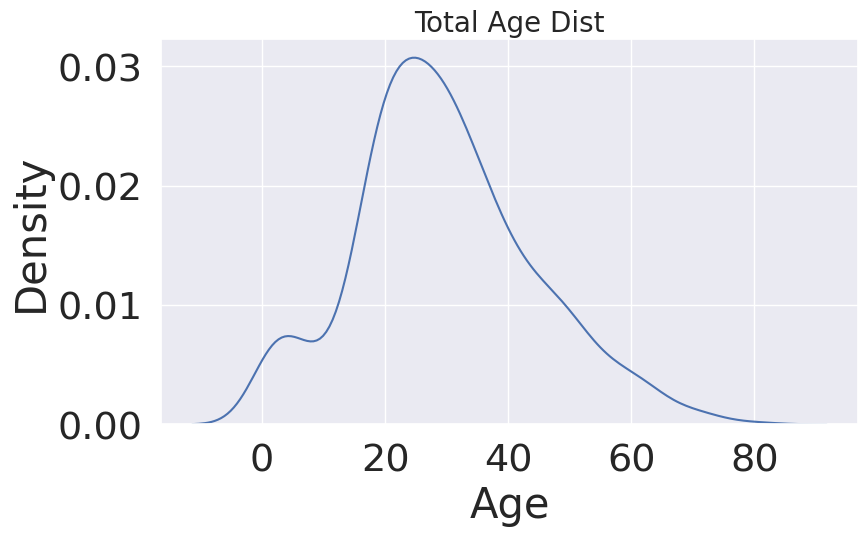

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train['Age'], ax=ax)
plt.title('Total Age Dist', fontsize= 20)

Text(0.5, 1.0, 'Age Dist Survived vs Dead')

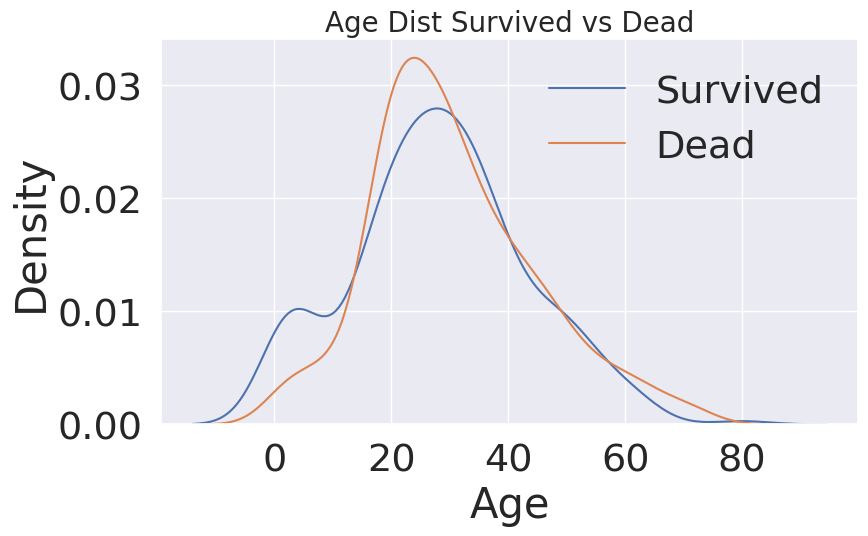

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.title('Age Dist Survived vs Dead', fontsize= 20)

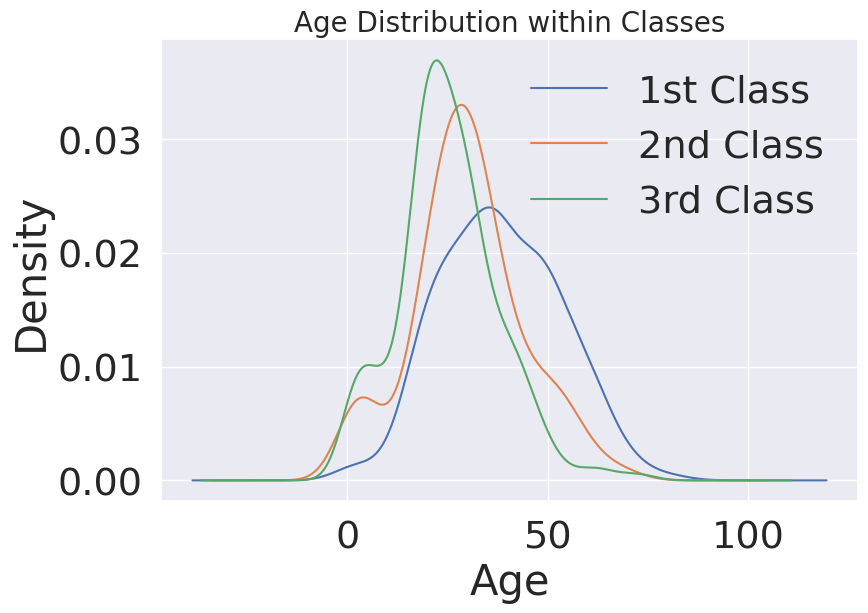

In [152]:
plt.figure(figsize=(9, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes', fontsize= 20)
plt.legend(['1st Class', '2nd Class', '3rd Class'])

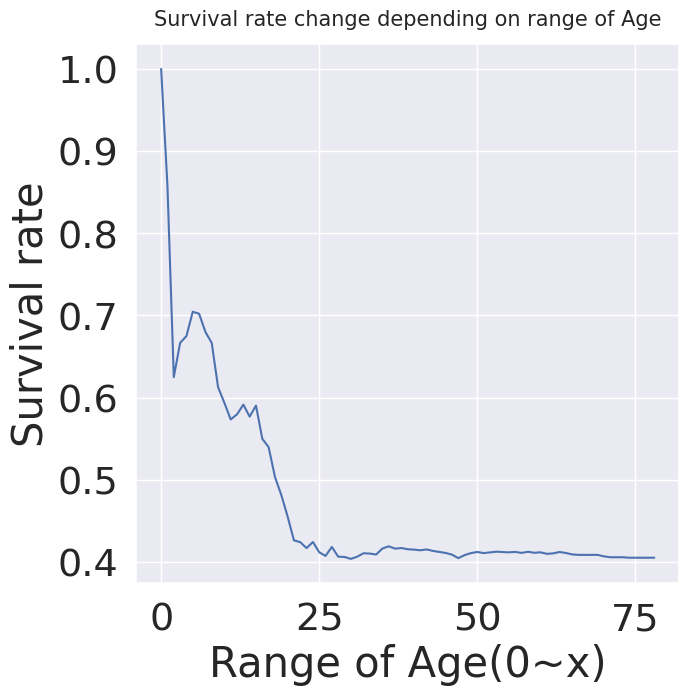

In [150]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() /
                                    len(df_train[df_train['Age'] < i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02, fontsize= 15)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 2-5. Pclass, Sex, Age

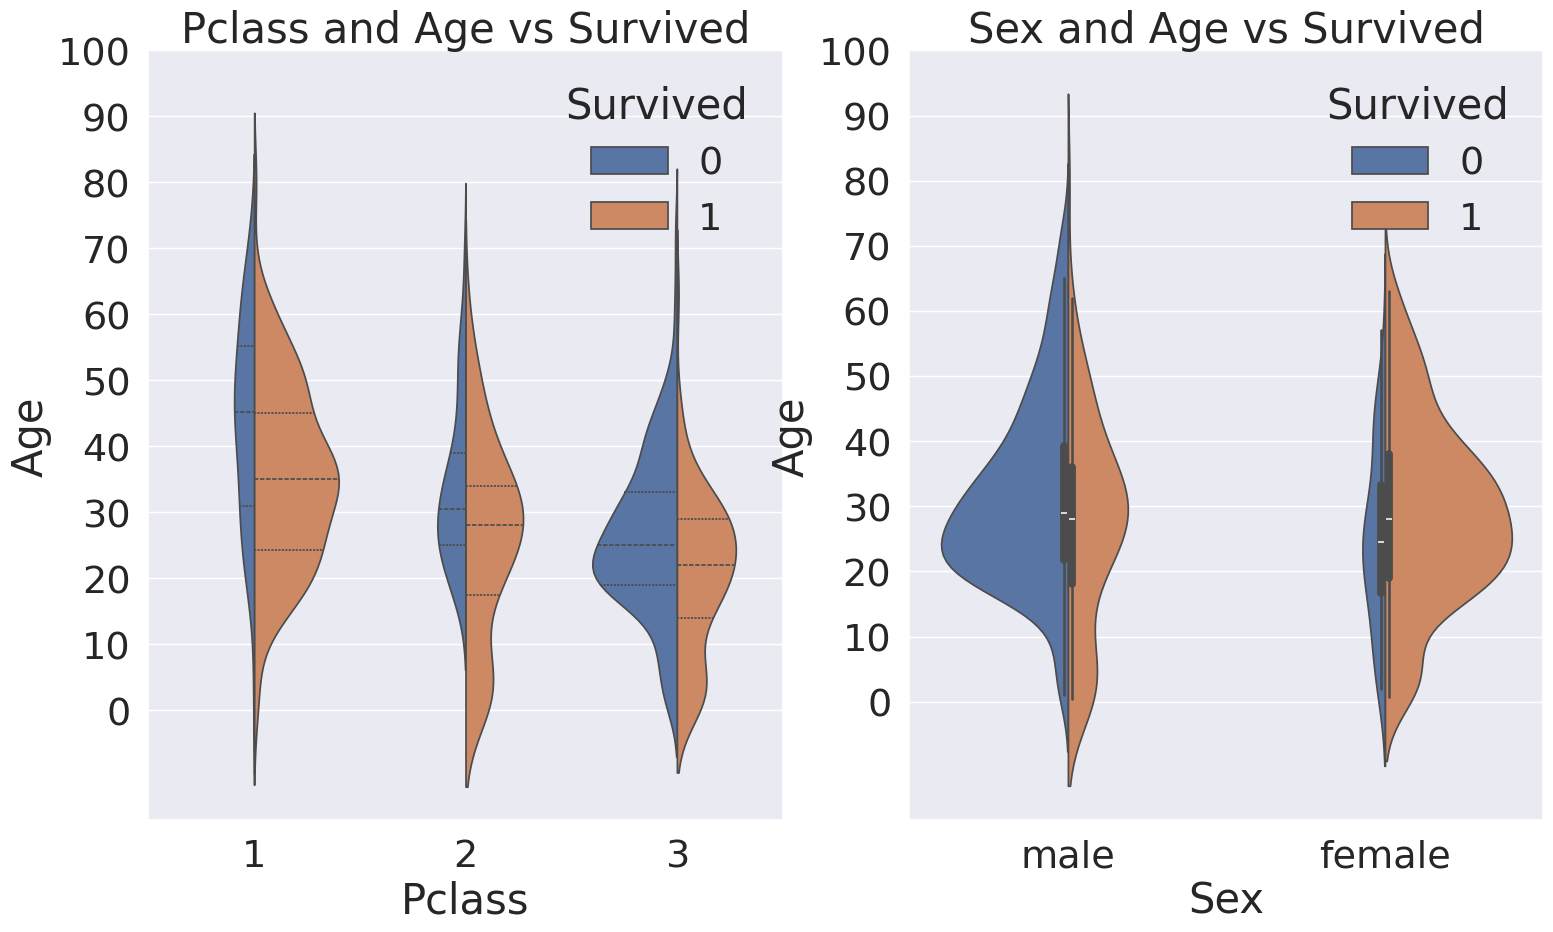

In [254]:
f, ax = plt.subplots(1, 2, figsize=(18,10))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0], inner = 'quartile')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))


### 2-6. Embarked

<Axes: xlabel='Embarked'>

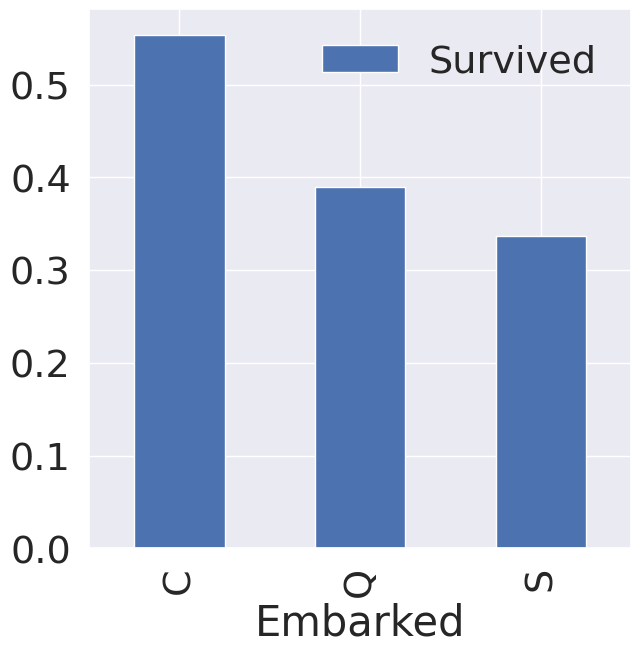

In [169]:
f, ax = plt.subplots(1, 1, figsize=(7,7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

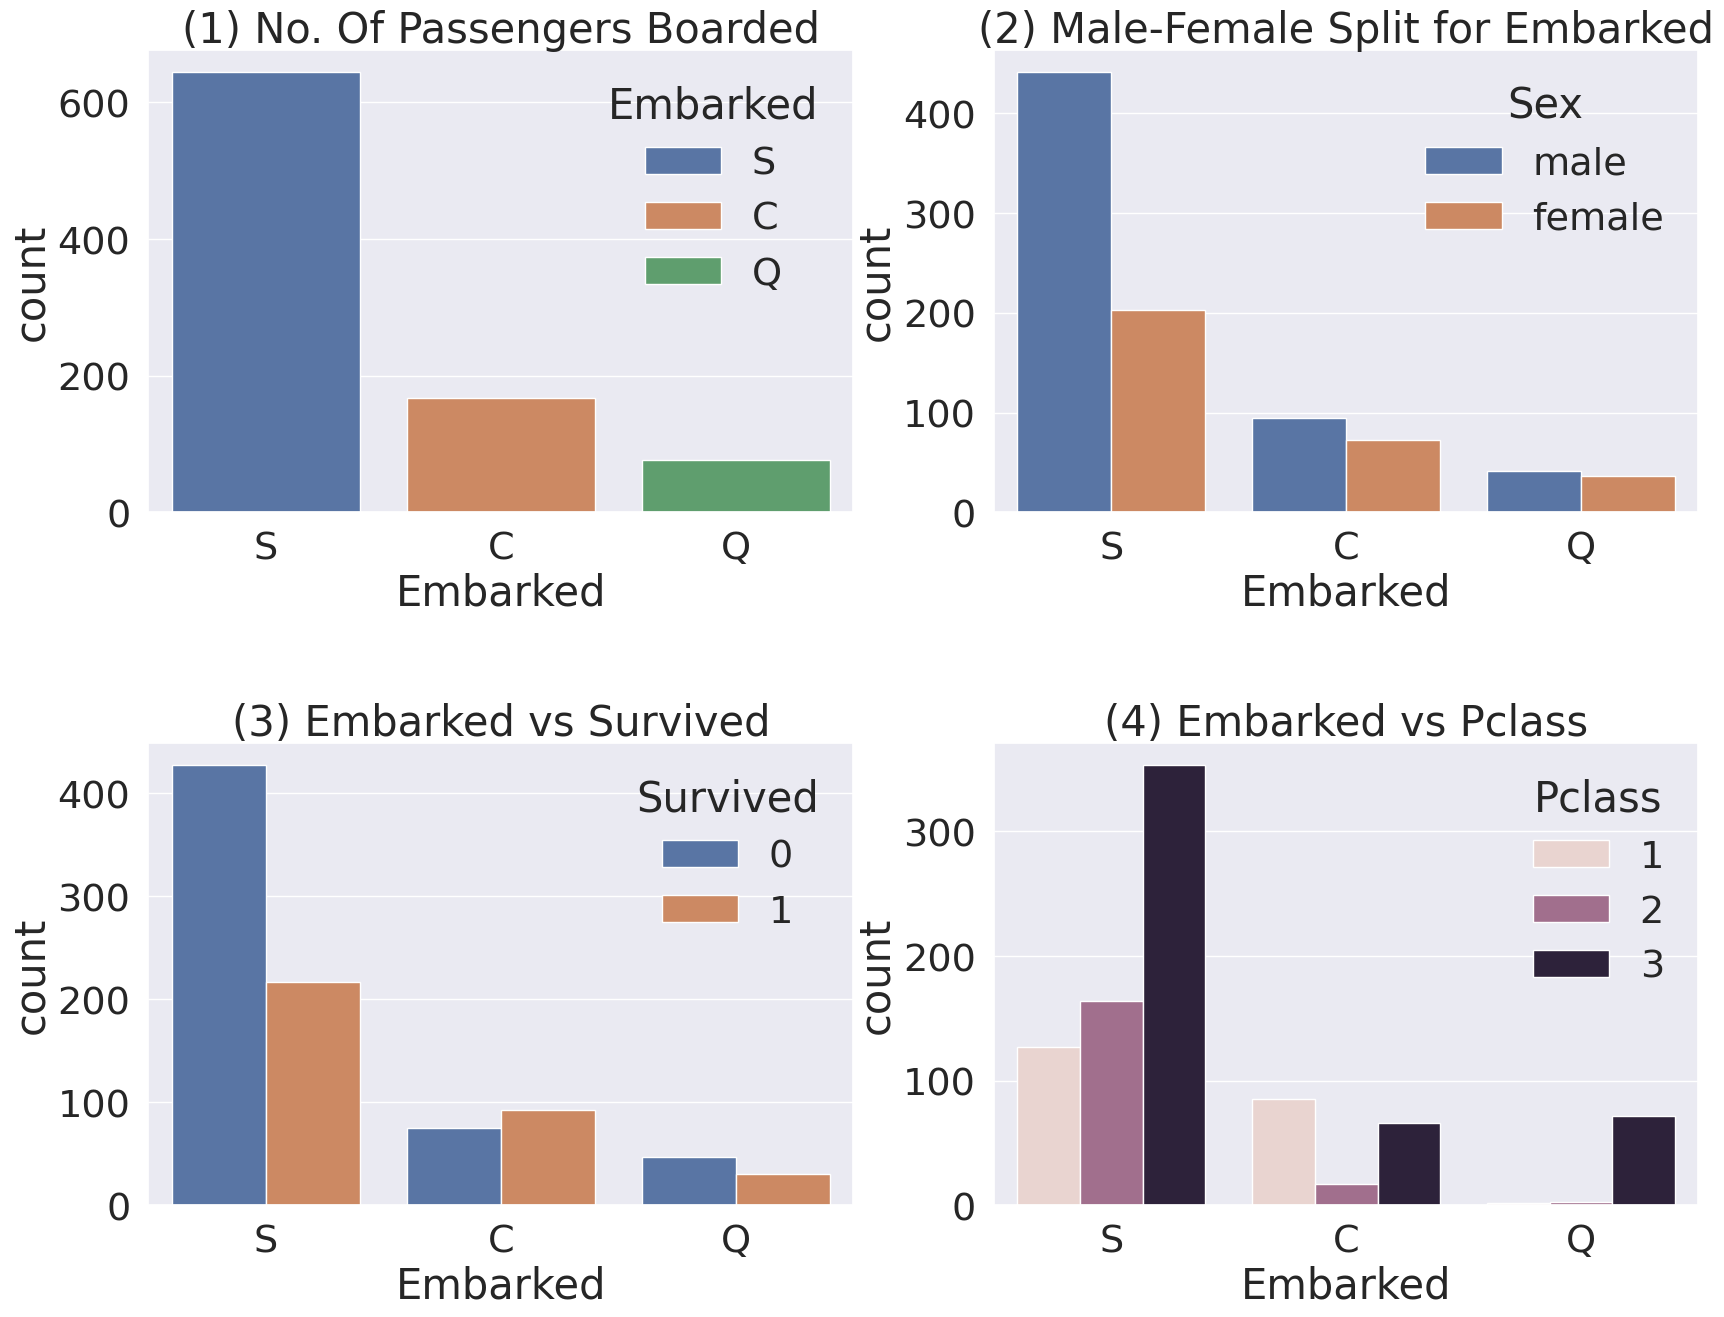

In [179]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', hue='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded', fontsize = 30)

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked', fontsize = 30)

sns.countplot(x= 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived', fontsize = 30)

sns.countplot(x= 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass', fontsize = 30)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2-7. Family - Sibsp + Parch

In [181]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [182]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


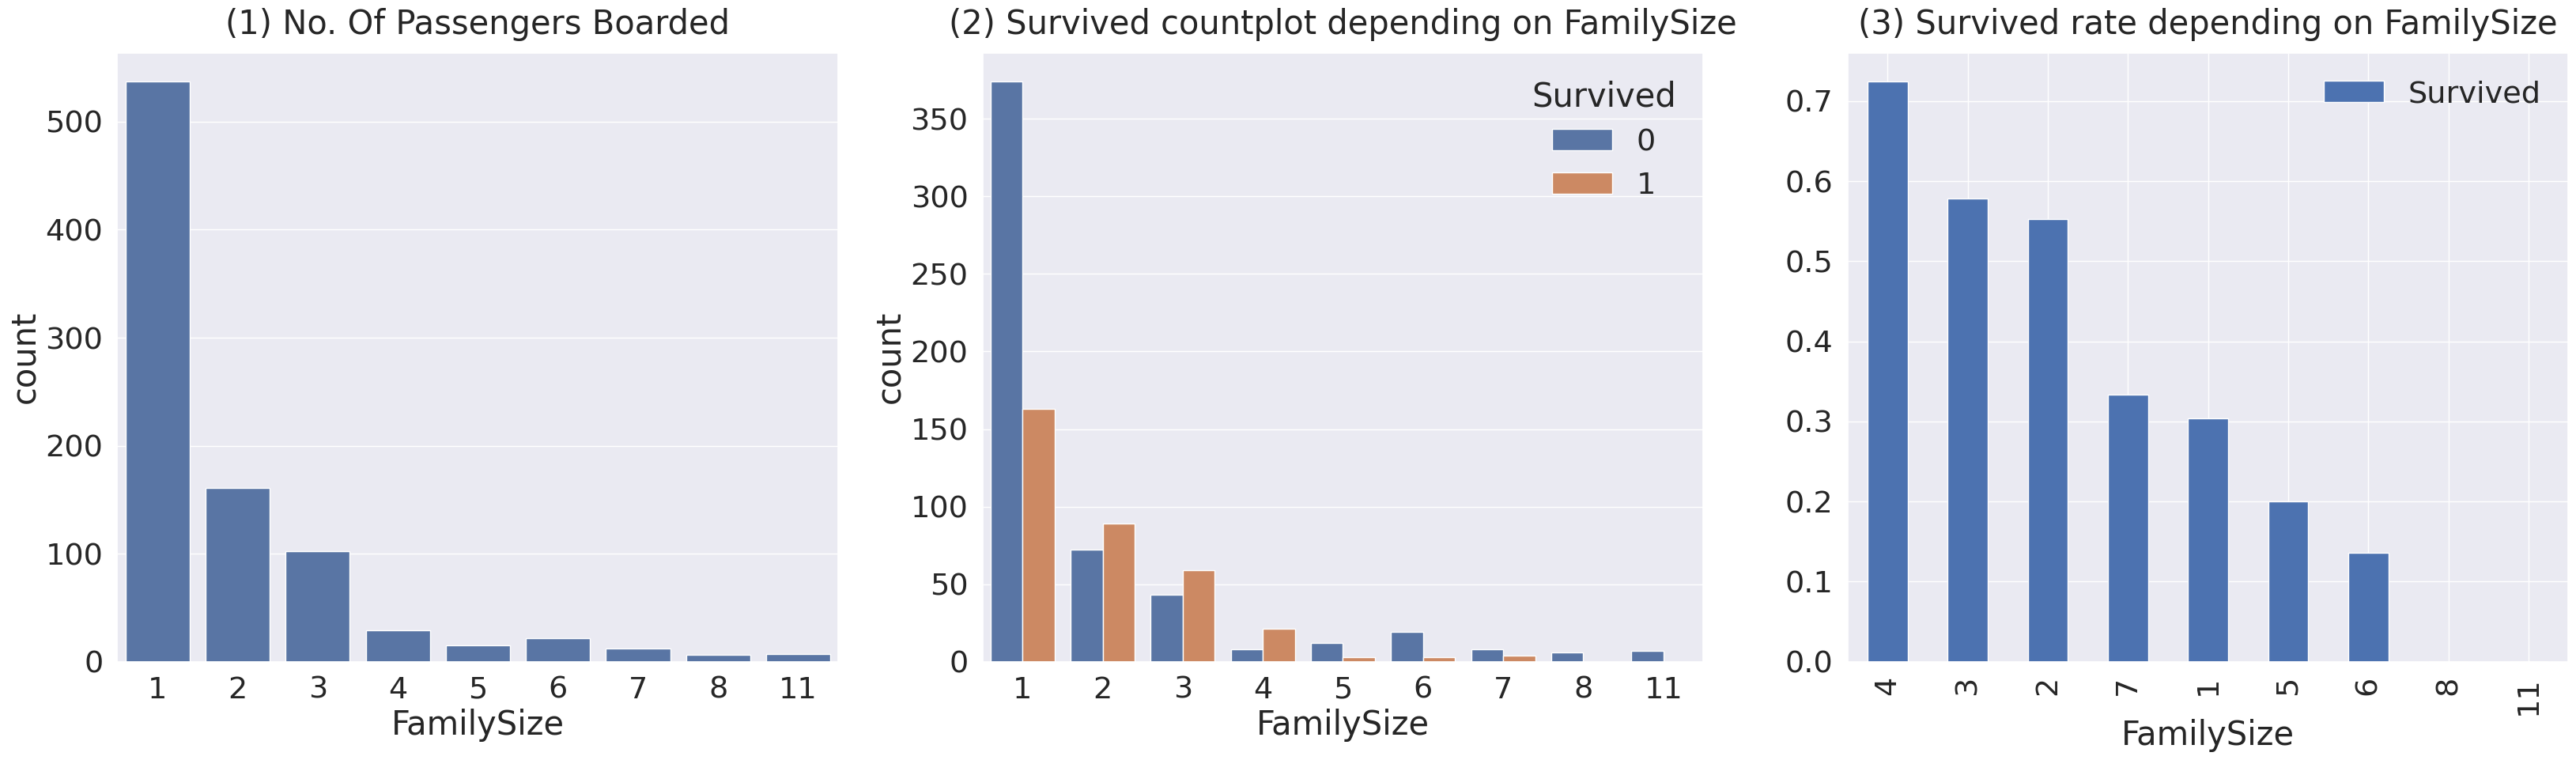

In [184]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x= 'FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x= 'FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2-8. Fare

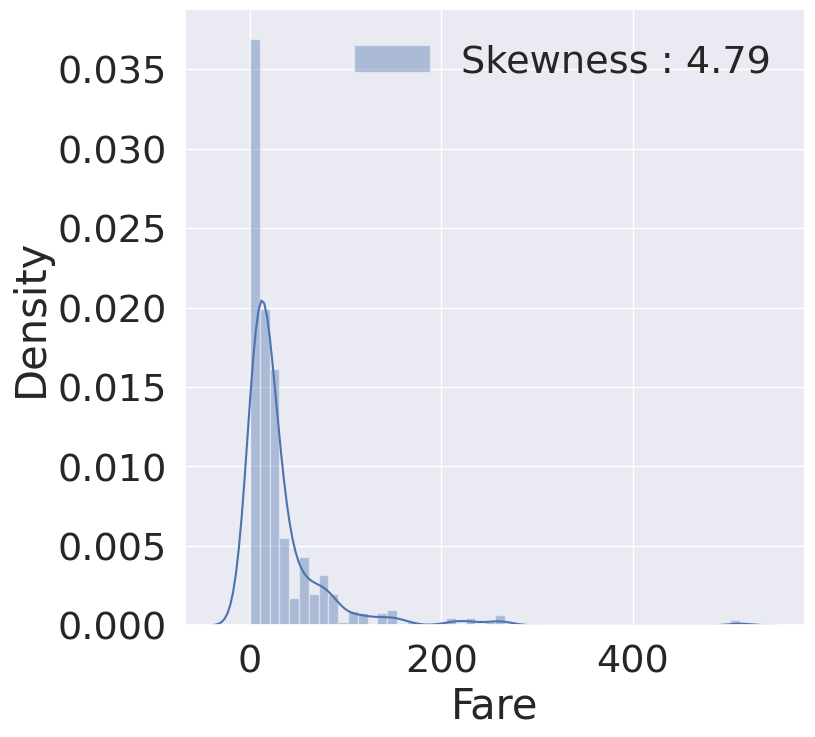

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [187]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
#nan value 평균값 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

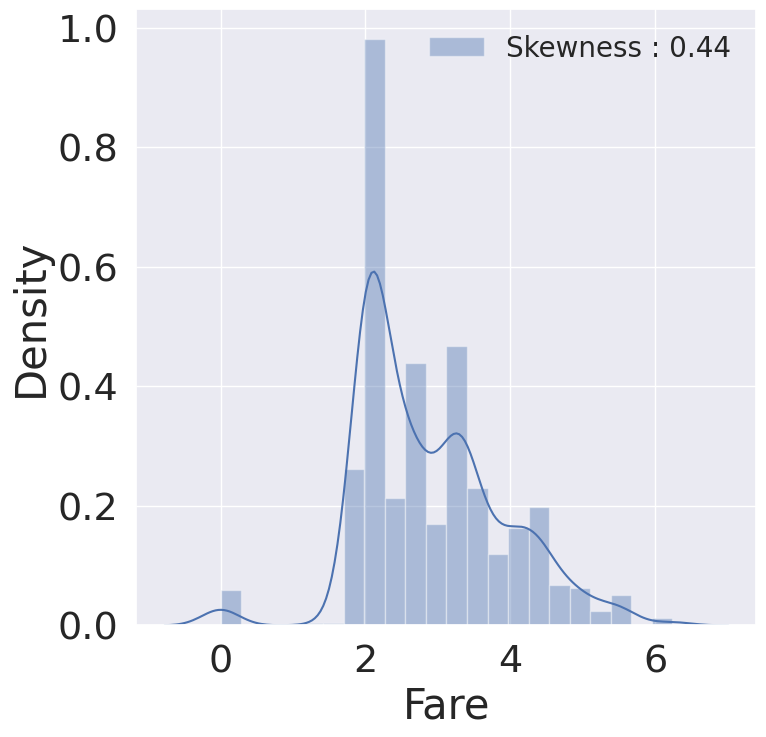

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

g= g.legend(loc='best', fontsize = 20)

### 2-9. Cabin

In [195]:
df_train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

### 2-10. Ticket

In [197]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [244]:
df_train['Has_Letter'] = df_train['Ticket'].str.contains('[a-zA-Z]').astype(int)
df_train[['Ticket', 'Has_Letter']].head()

,Ticket,Has_Letter
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,0
4,373450,0


In [217]:
df_train[df_train['Has_Letter']==1].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Has_Letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,2.815409,G6,S,3,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,2.085672,NaN,S,1,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,3.322183,NaN,C,1,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,4.987167,B78,C,2,1
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,2.351375,NaN,S,1,1
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,4.408800,NaN,C,2,1
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,2.085672,NaN,S,1,1


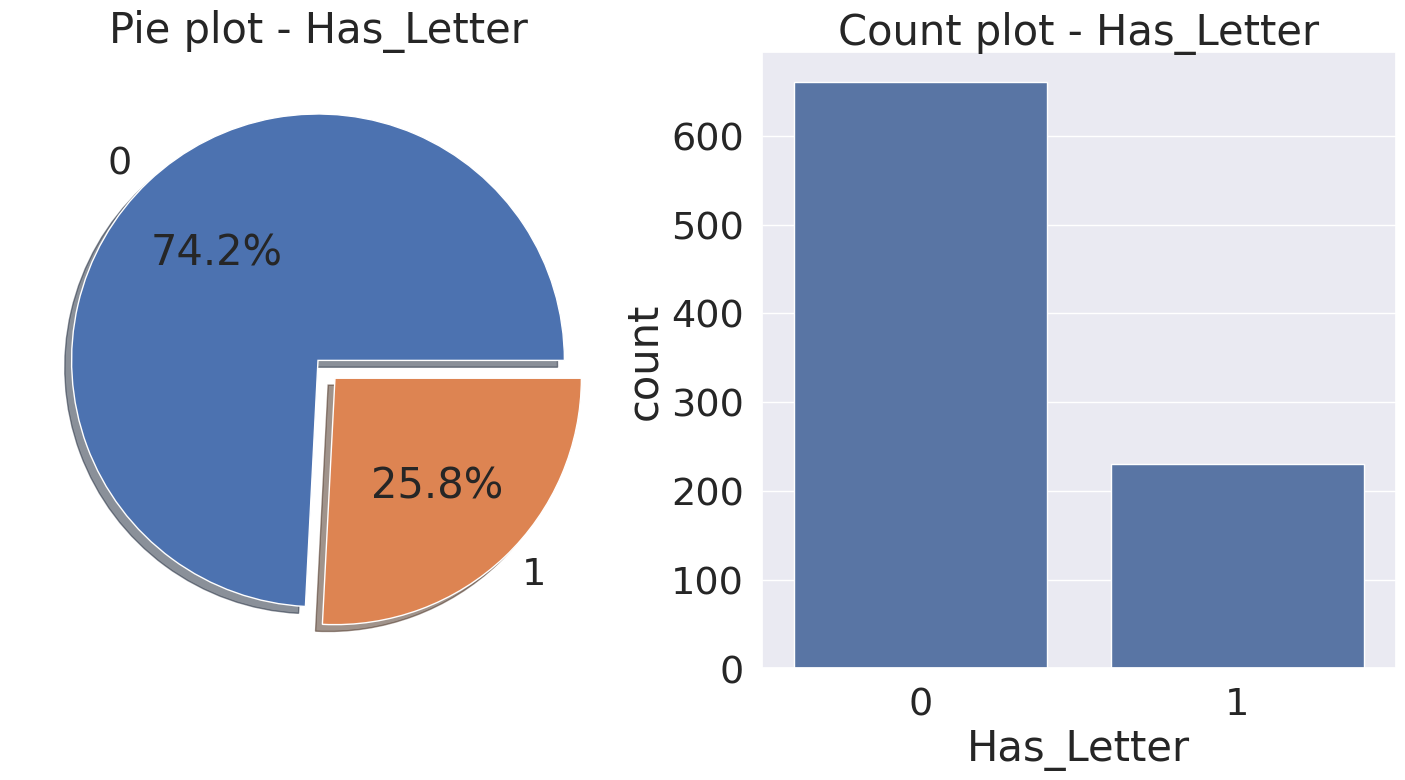

In [211]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Has_Letter'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Has_Letter')
ax[0].set_ylabel('')

sns.countplot(x='Has_Letter', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Has_Letter')

plt.show()


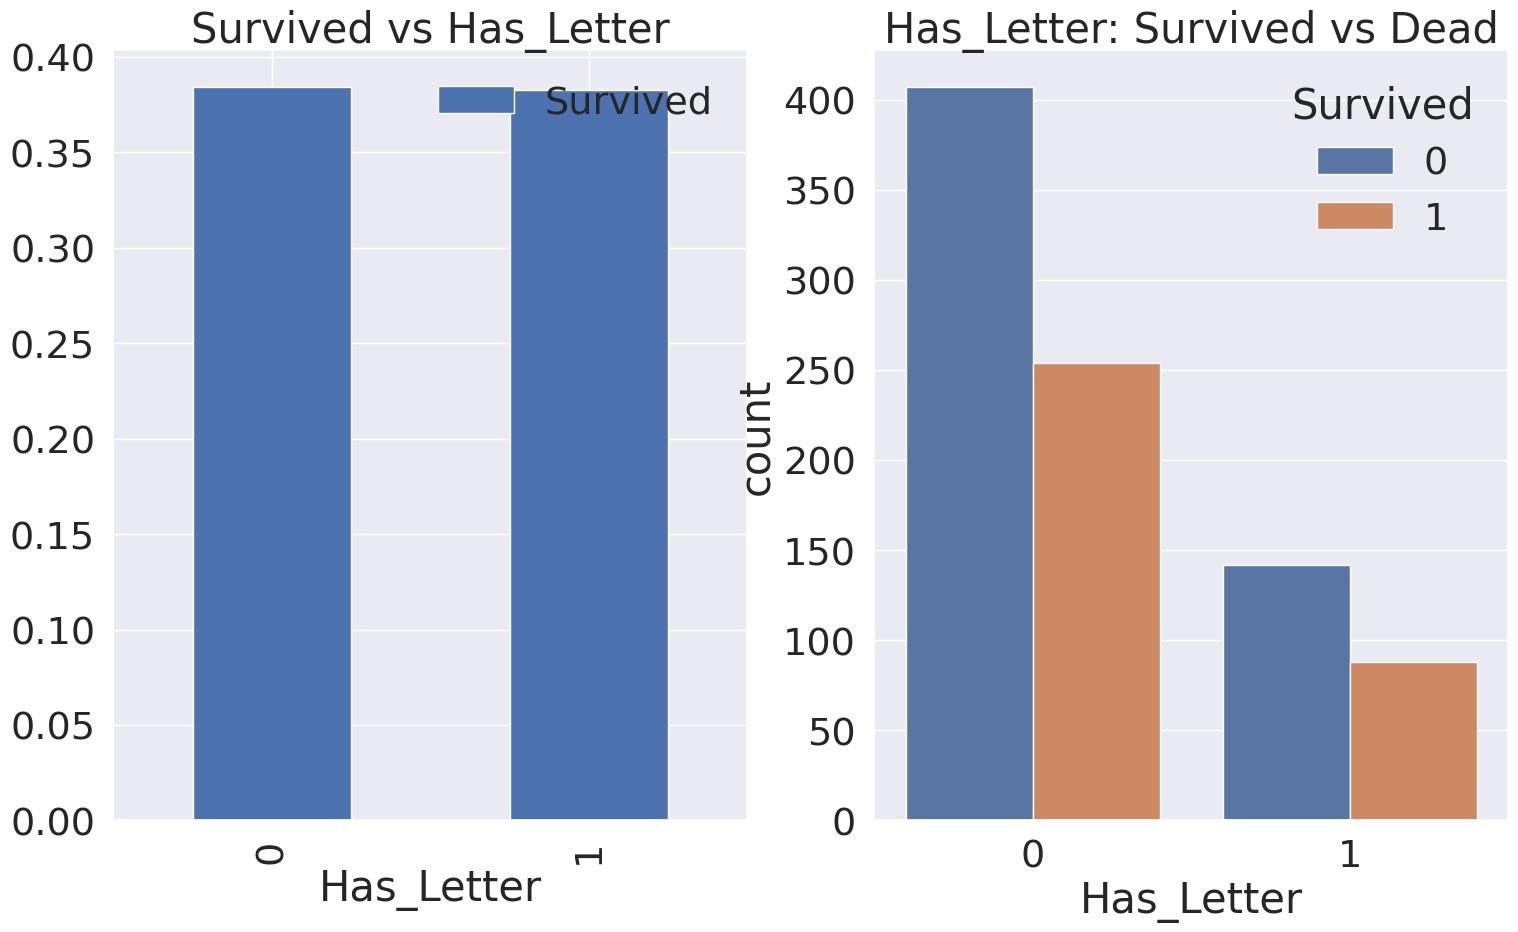

In [213]:
f, ax = plt.subplots(1, 2, figsize=(18,10))
df_train[['Has_Letter', 'Survived']].groupby(['Has_Letter'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Has_Letter')
sns.countplot(x = 'Has_Letter', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Has_Letter: Survived vs Dead')
plt.show()

In [218]:
df_train_w_letter = df_train[df_train['Has_Letter']==1]

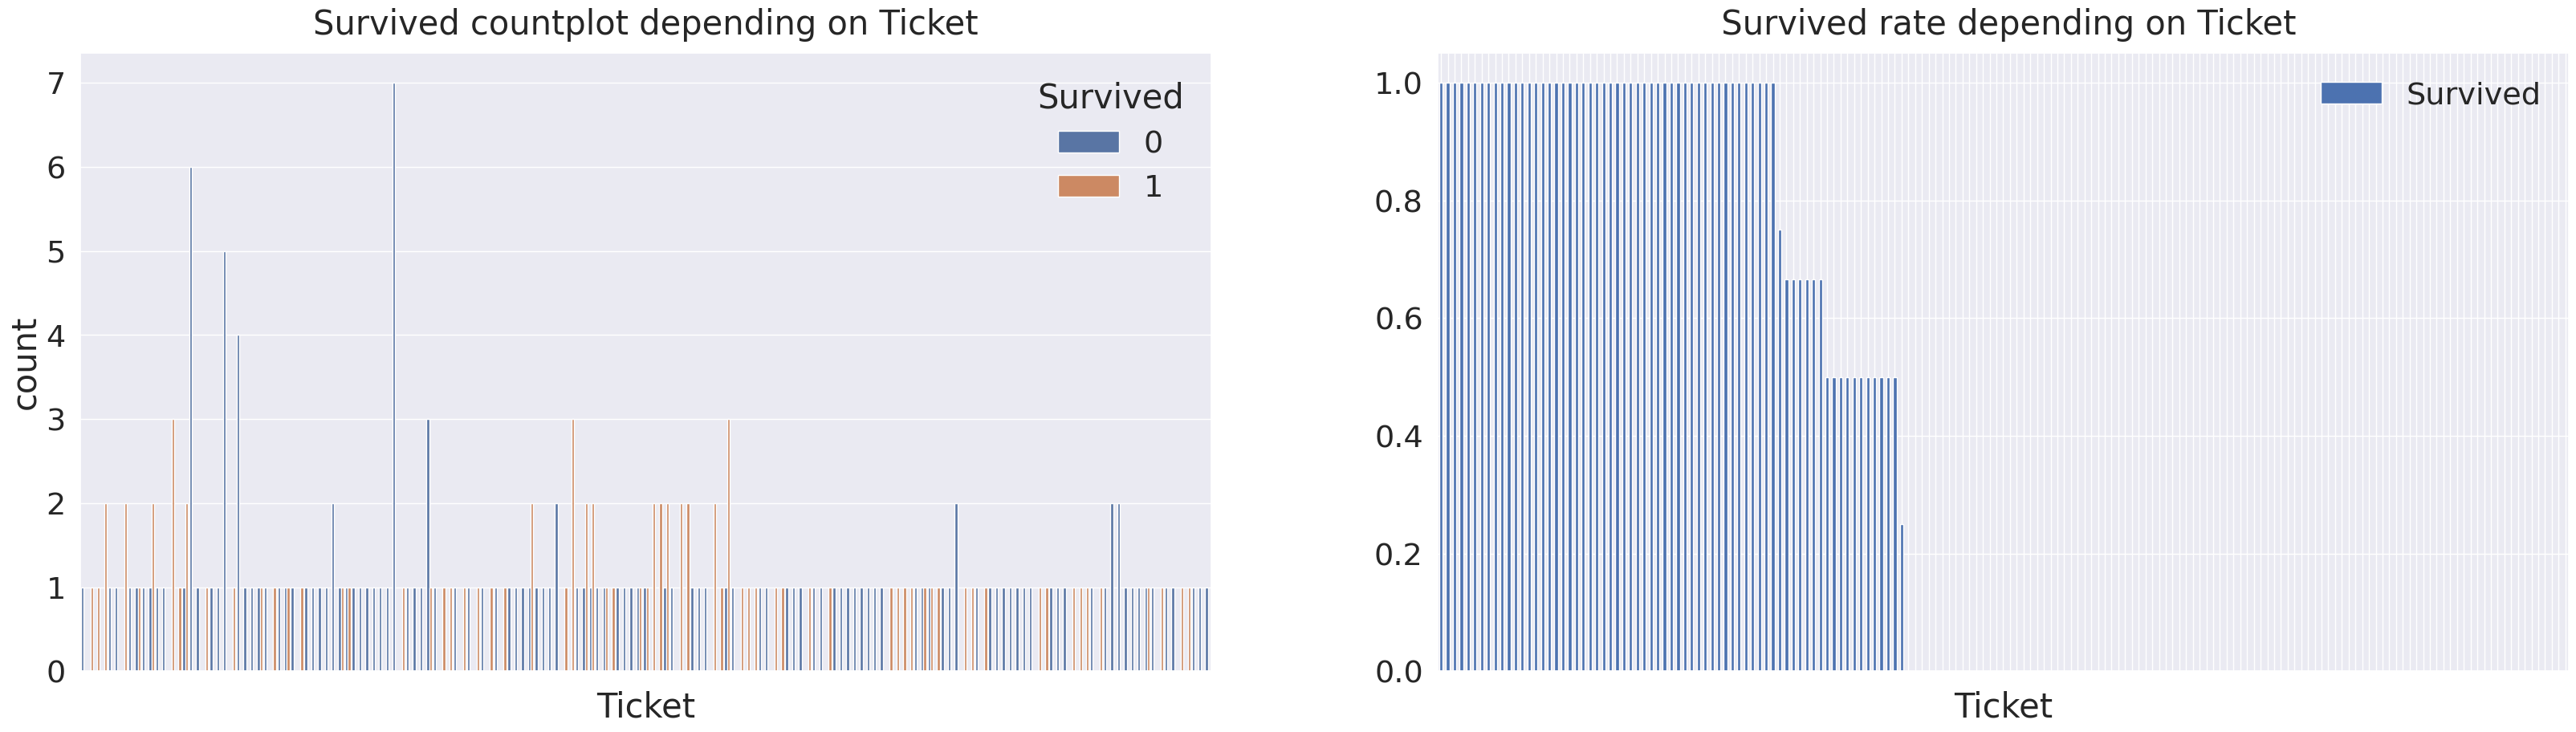

In [228]:
f,ax=plt.subplots(1, 2, figsize=(40,10))

sns.countplot(x= 'Ticket', hue='Survived', data=df_train_w_letter, ax=ax[0])
ax[0].set_title('Survived countplot depending on Ticket',  y=1.02)
ax[0].set_xticklabels([])

df_train_w_letter[['Ticket','Survived']].groupby(['Ticket'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[1])
ax[1].set_title(' Survived rate depending on Ticket',  y=1.02)
ax[1].set_xticklabels([])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [250]:
ticket_survival_rate = df_train_w_letter.groupby('Ticket')['Survived'].mean()
tickets_sorted_by_survival_rate = ticket_survival_rate.sort_values(ascending=False)

tickets_sorted_by_survival_rate.head(30)


Ticket
CA. 2314             1.0
C.A. 33595           1.0
PC 17473             1.0
SOTON/OQ 392089      1.0
PC 17603             1.0
SC/PARIS 2146        1.0
SC/PARIS 2149        1.0
PC 17599             1.0
PC 17592             1.0
C.A. 29395           1.0
SO/C 14885           1.0
C.A. 31026           1.0
PC 17585             1.0
C.A. 34260           1.0
PC 17608             1.0
C.A. 37671           1.0
PC 17572             1.0
PC 17569             1.0
SOTON/O.Q. 392078    1.0
PC 17485             1.0
PC 17482             1.0
PC 17477             1.0
F.C.C. 13528         1.0
F.C.C. 13531         1.0
PC 17476             1.0
PC 17475             1.0
STON/O 2. 3101269    1.0
C 7077               1.0
C 17369              1.0
A/5 3540             1.0
Name: Survived, dtype: float64

In [251]:
tickets_sorted_by_survival_rate_lowest = ticket_survival_rate.sort_values(ascending=True)

tickets_sorted_by_survival_rate_lowest.head(30)


Ticket
A./5. 2152            0.0
SCO/W 1585            0.0
SC/Paris 2163         0.0
SC/PARIS 2167         0.0
SC/PARIS 2133         0.0
SC/PARIS 2131         0.0
SC/AH 29037           0.0
S.P. 3464             0.0
S.O.P. 1166           0.0
S.O.C. 14879          0.0
S.O./P.P. 751         0.0
S.O./P.P. 3           0.0
S.C./A.4. 23567       0.0
PP 4348               0.0
PC 17754              0.0
PC 17612              0.0
PC 17609              0.0
PC 17605              0.0
PC 17601              0.0
W/C 14208             0.0
PC 17597              0.0
PC 17596              0.0
PC 17595              0.0
PC 17593              0.0
PC 17590              0.0
PC 17483              0.0
SOTON/O.Q. 3101305    0.0
PC 17318              0.0
SOTON/O.Q. 3101306    0.0
SOTON/O.Q. 3101310    0.0
Name: Survived, dtype: float64

In [242]:
df_ticket_CA = df_train_w_letter[df_train_w_letter['Ticket'].str.contains('C') & df_train_w_letter['Ticket'].str.contains('A')]
df_ticket_CA.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Has_Letter
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,2.351375,NaN,S,1,1
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,2.085672,NaN,S,1,1
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,2.351375,NaN,S,1,1
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,3.323236,NaN,S,4,1
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,3.848018,NaN,S,8,1


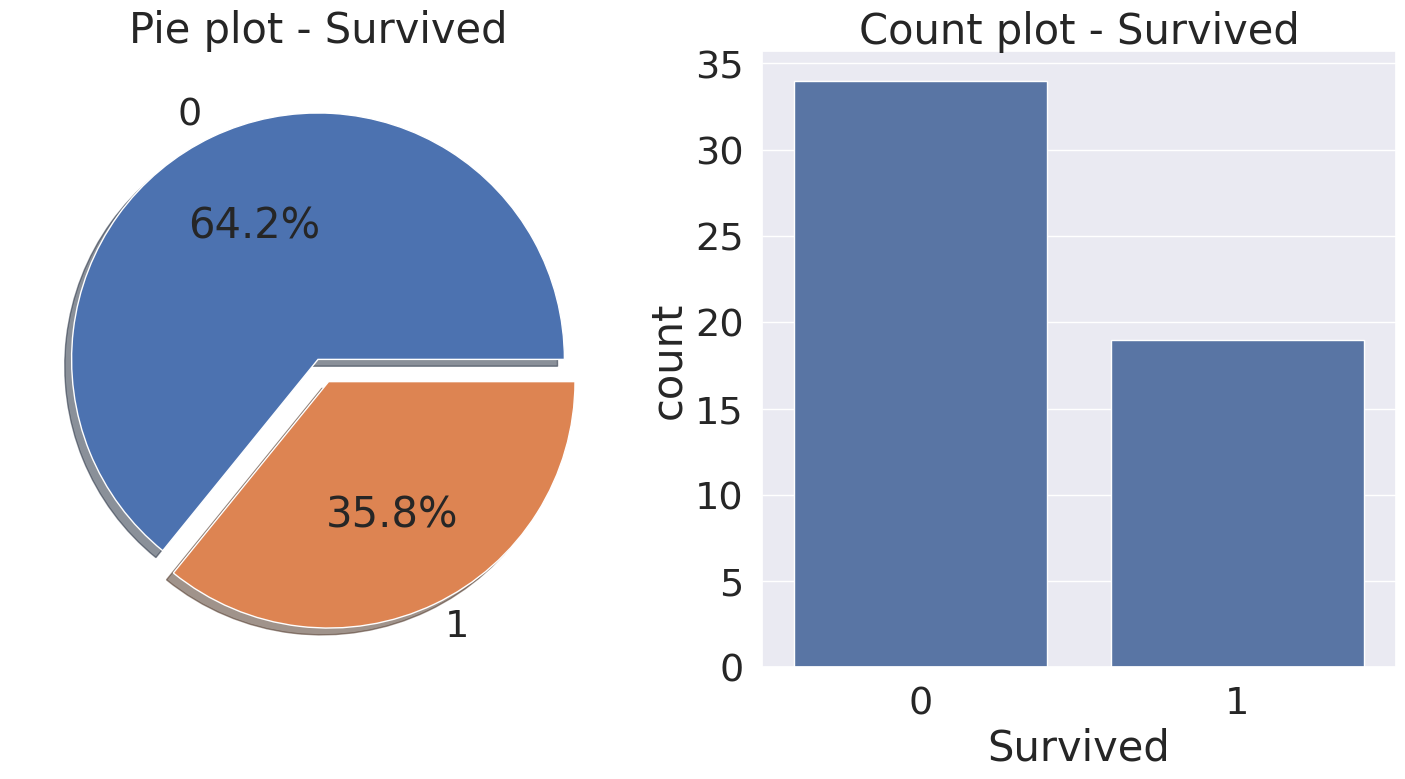

In [240]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_ticket_CA['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_ticket_CA, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()
